In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
matches = pd.read_csv("C:/Users/akhil/OneDrive/Desktop/IPL_project/Datasets/matches.csv")
deliveries = pd.read_csv("C:/Users/akhil/OneDrive/Desktop/IPL_project/Datasets/deliveries.csv")

In [2]:
season = np.sort(matches['season'].unique())
print("The Number of Seasons in all are",len(season), "which are" , season)

The Number of Seasons in all are 12 which are [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


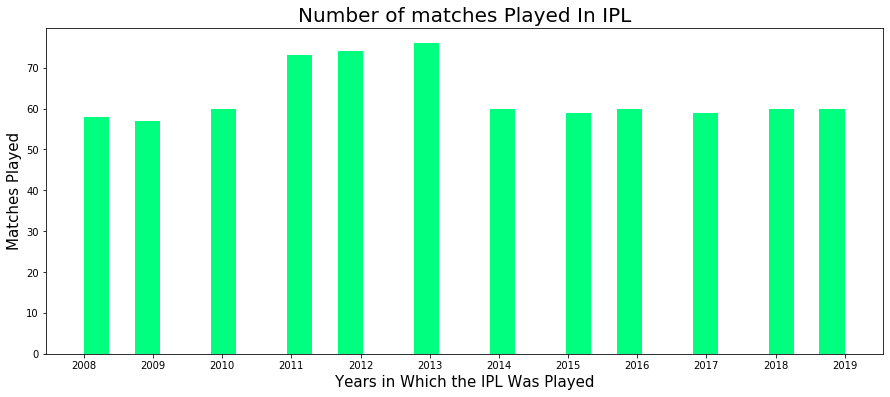

In [3]:
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 6
matches['season'].hist(color = 'springgreen',bins = 30,  grid = False,density=False)
plt.title("Number of matches Played In IPL",fontsize = 20)
plt.xlabel("Years in Which the IPL Was Played", fontsize = 15)
plt.ylabel("Matches Played", fontsize = 15)
plt.xticks(np.arange(2008,2020, step = 1))
plt.show()

In [4]:
i = 0;
match_no = []
while(i < len(season)):
    match_no.append(len(matches[matches['season'] == season[i]]['id']))
    i = i + 1;
mean = np.mean(match_no)
print("The Average Number of Matches played in all seasons combined", mean)

The Average Number of Matches played in all seasons combined 63.0


In [5]:
team1 = matches['team1'].unique()
matches = matches.replace("Rising Pune Supergiants", "Rising Pune Supergiant")
print("The total teams that participated in all seasons of IPLs are", len(team1))
matches['team1'].unique()

The total teams that participated in all seasons of IPLs are 15


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

Text(0.5, 1.0, 'Bar Plot for total matches and wins of Each Team in All Seasons')

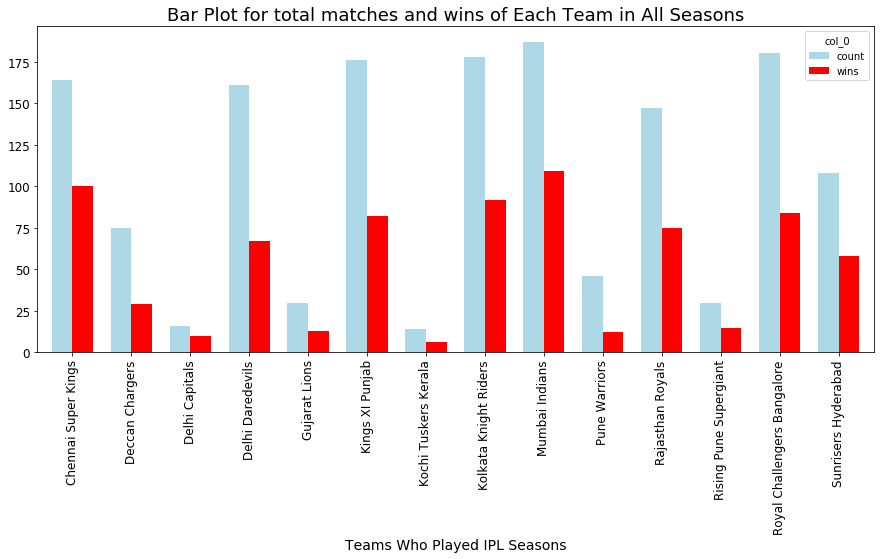

In [6]:
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 6
team1 = matches['team1'].unique()
team1_all = pd.crosstab(index = matches['team1'], columns = 'count')
team2_all = pd.crosstab(index = matches['team2'], columns = 'count')
final_team = team1_all.add(team2_all)
winner = pd.crosstab(index = matches['winner'], columns = "count")
final_team['wins'] = winner['count']
final_team[['count', 'wins']].plot(kind = 'bar' ,  width = 0.7,   color=['lightblue' , 'red'],fontsize = 12)
plt.xlabel("Teams Who Played IPL Seasons", fontsize = 14)
plt.title("Bar Plot for total matches and wins of Each Team in All Seasons", fontsize = 18)

In [7]:
final_team['percent'] = final_team['wins']/final_team['count'] * 100 
final_team.sort_values(by = 'percent', ascending = False)

col_0,count,wins,percent
team1,,,
Delhi Capitals,16,10,62.500000
Chennai Super Kings,164,100,60.975610
Mumbai Indians,187,109,58.288770
Sunrisers Hyderabad,108,58,53.703704
Kolkata Knight Riders,178,92,51.685393
Rajasthan Royals,147,75,51.020408
Rising Pune Supergiant,30,15,50.000000
Royal Challengers Bangalore,180,84,46.666667
Kings XI Punjab,176,82,46.590909


In [8]:
mean = final_team['count'].mean()
print("The average no. of matches are", mean)
print("The teams who have played less than average matches are" ,sum(final_team['count'] < mean))

The average no. of matches are 108.0
The teams who have played less than average matches are 6


In [9]:
mean_win = final_team['percent'].mean()
print("The average percent win is", mean_win)
print("The teams who have won more than average winning percentage are" ,sum(final_team['percent'] > mean_win))

The average percent win is 48.14217620740895
The teams who have won more than average winning percentage are 7


Text(0, 0.5, 'Teams Playing in IPL in all Seasons')

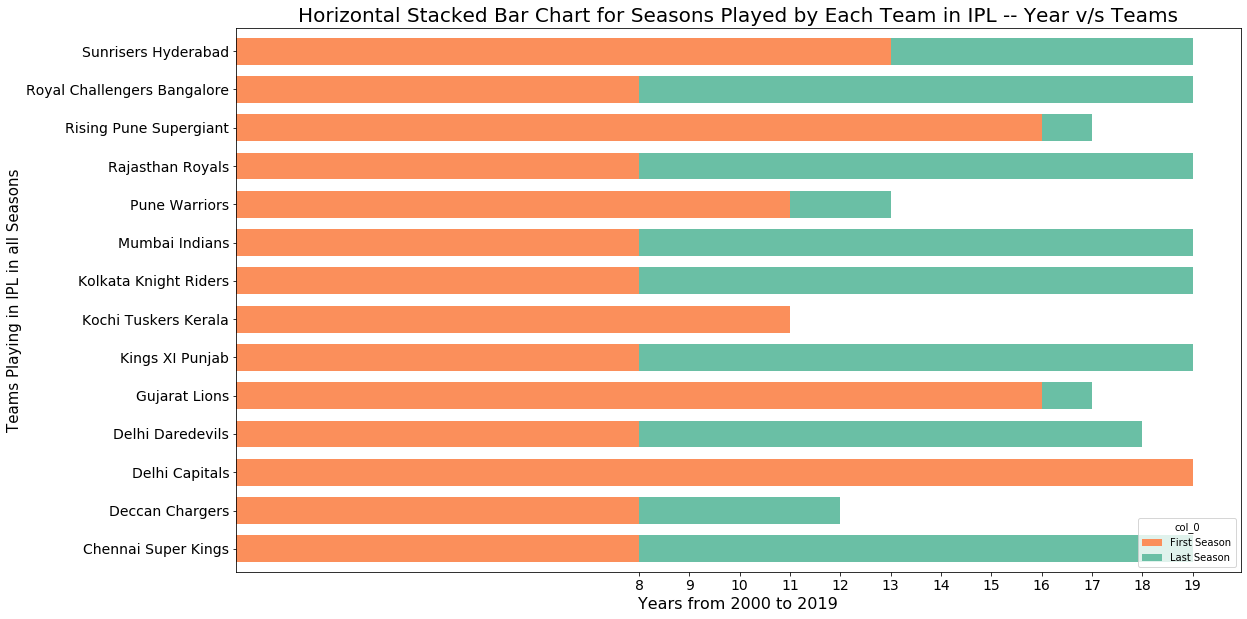

In [10]:
i = 0;
team_order = np.sort(matches['team1'].unique())
array = []
first = []
last = []
while i < 14:
    array = np.sort(list(matches[matches['team1'] == team_order[i]]['season'].unique()))
    first.append(array[0] % 2000)
    last.append(array[len(array)-1] - array[0])
    i = i +1
final_team['First Season']= first
final_team['Last Season'] = last
final_team['seasons'] = [x+1 for x in last]
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 10
final_team[['First Season' , 'Last Season']].plot(kind = 'barh', stacked = True, rot = 0, xticks = np.arange(8,20,1),
                                                  fontsize = 14,width = 0.7,   color=['#FB8F5B' , '#6ABFA5']) 
plt.title('Horizontal Stacked Bar Chart for Seasons Played by Each Team in IPL -- Year v/s Teams', fontsize = 20)
plt.xlabel("Years from 2000 to 2019", fontsize = 16)
plt.ylabel("Teams Playing in IPL in all Seasons", fontsize  = 15)

In [11]:
final_team = final_team.drop(columns = ['First Season' , 'Last Season'])
final_team.sort_values(['seasons', 'percent'], ascending = [False, False])

col_0,count,wins,percent,seasons
team1,,,,
Chennai Super Kings,164,100,60.975610,12
Mumbai Indians,187,109,58.288770,12
Kolkata Knight Riders,178,92,51.685393,12
Rajasthan Royals,147,75,51.020408,12
Royal Challengers Bangalore,180,84,46.666667,12
Kings XI Punjab,176,82,46.590909,12
Delhi Daredevils,161,67,41.614907,11
Sunrisers Hyderabad,108,58,53.703704,7
Deccan Chargers,75,29,38.666667,5


In [12]:
null = matches.isnull()
print("The entries which have no cities mentioned are" , sum(null['city']))
print(matches[null['city'] == True]['id'])
matches_clean = matches.drop(matches.index[[461,462,466,468,469,474,476]])


The entries which have no cities mentioned are 7
461    462
462    463
466    467
468    469
469    470
474    475
476    477
Name: id, dtype: int64


In [13]:
final_team_city = final_team[final_team['count'] > 70]
final_team_city = final_team_city.sort_values(by = 'count', ascending = False)
cities = pd.crosstab(index = matches_clean['city'], columns = 'count').sort_values(by = 'count', ascending = False)
cities_analyse = cities[cities['count'] > 40]

In [14]:
matches_city1 = matches[matches['city'] == "Mumbai"] 
team1_mumbai = pd.crosstab(index = matches_city1['team1'], columns = 'count')
team2_mumbai = pd.crosstab(index = matches_city1['team2'], columns = 'count')
team_city1 = team1_mumbai.add(team2_mumbai)
team_city1 = team_city1[team_city1['count'] > 5]


matches_city2 = matches[matches['city'] == "Bangalore"]
team1_bangalore = pd.crosstab(index = matches_city2['team1'], columns = 'count')
team2_bangalore = pd.crosstab(index = matches_city2['team2'], columns = 'count')
team_city2 = team1_bangalore.add(team2_bangalore)
team_city2 = team_city2[team_city2['count'] > 5]
matches_city3 = matches[matches['city'] == "Chennai"]
team1_chennai = pd.crosstab(index = matches_city3['team1'], columns = 'count')
team2_chennai = pd.crosstab(index = matches_city3['team2'], columns = 'count')
team_city3 = team1_chennai.add(team2_chennai)
team_city3 = team_city3[team_city3['count'] > 5]
matches_city4 = matches[matches['city'] == "Delhi"]
team1_delhi = pd.crosstab(index = matches_city4['team1'], columns = 'count')
team2_delhi = pd.crosstab(index = matches_city4['team2'], columns = 'count')
team_city4 = team1_delhi.add(team2_delhi)
team_city4 = team_city4[team_city4['count'] > 5]
matches_city5 = matches[matches['city'] == "Kolkata"]
team1_kolkata = pd.crosstab(index = matches_city5['team1'], columns = 'count')
team2_kolkata = pd.crosstab(index = matches_city5['team2'], columns = 'count')
team_city5 = team1_kolkata.add(team2_kolkata)
team_city5 = team_city5[team_city5['count'] > 5]
matches_city6 = matches[matches['city'] == "Hyderabad"]
team1_chandigarh = pd.crosstab(index = matches_city6['team1'], columns = 'count')
team2_chandigarh = pd.crosstab(index = matches_city6['team2'], columns = 'count')
team_city6 = team1_chandigarh.add(team2_chandigarh)
team_city6 = team_city6[team_city6['count'] > 5]

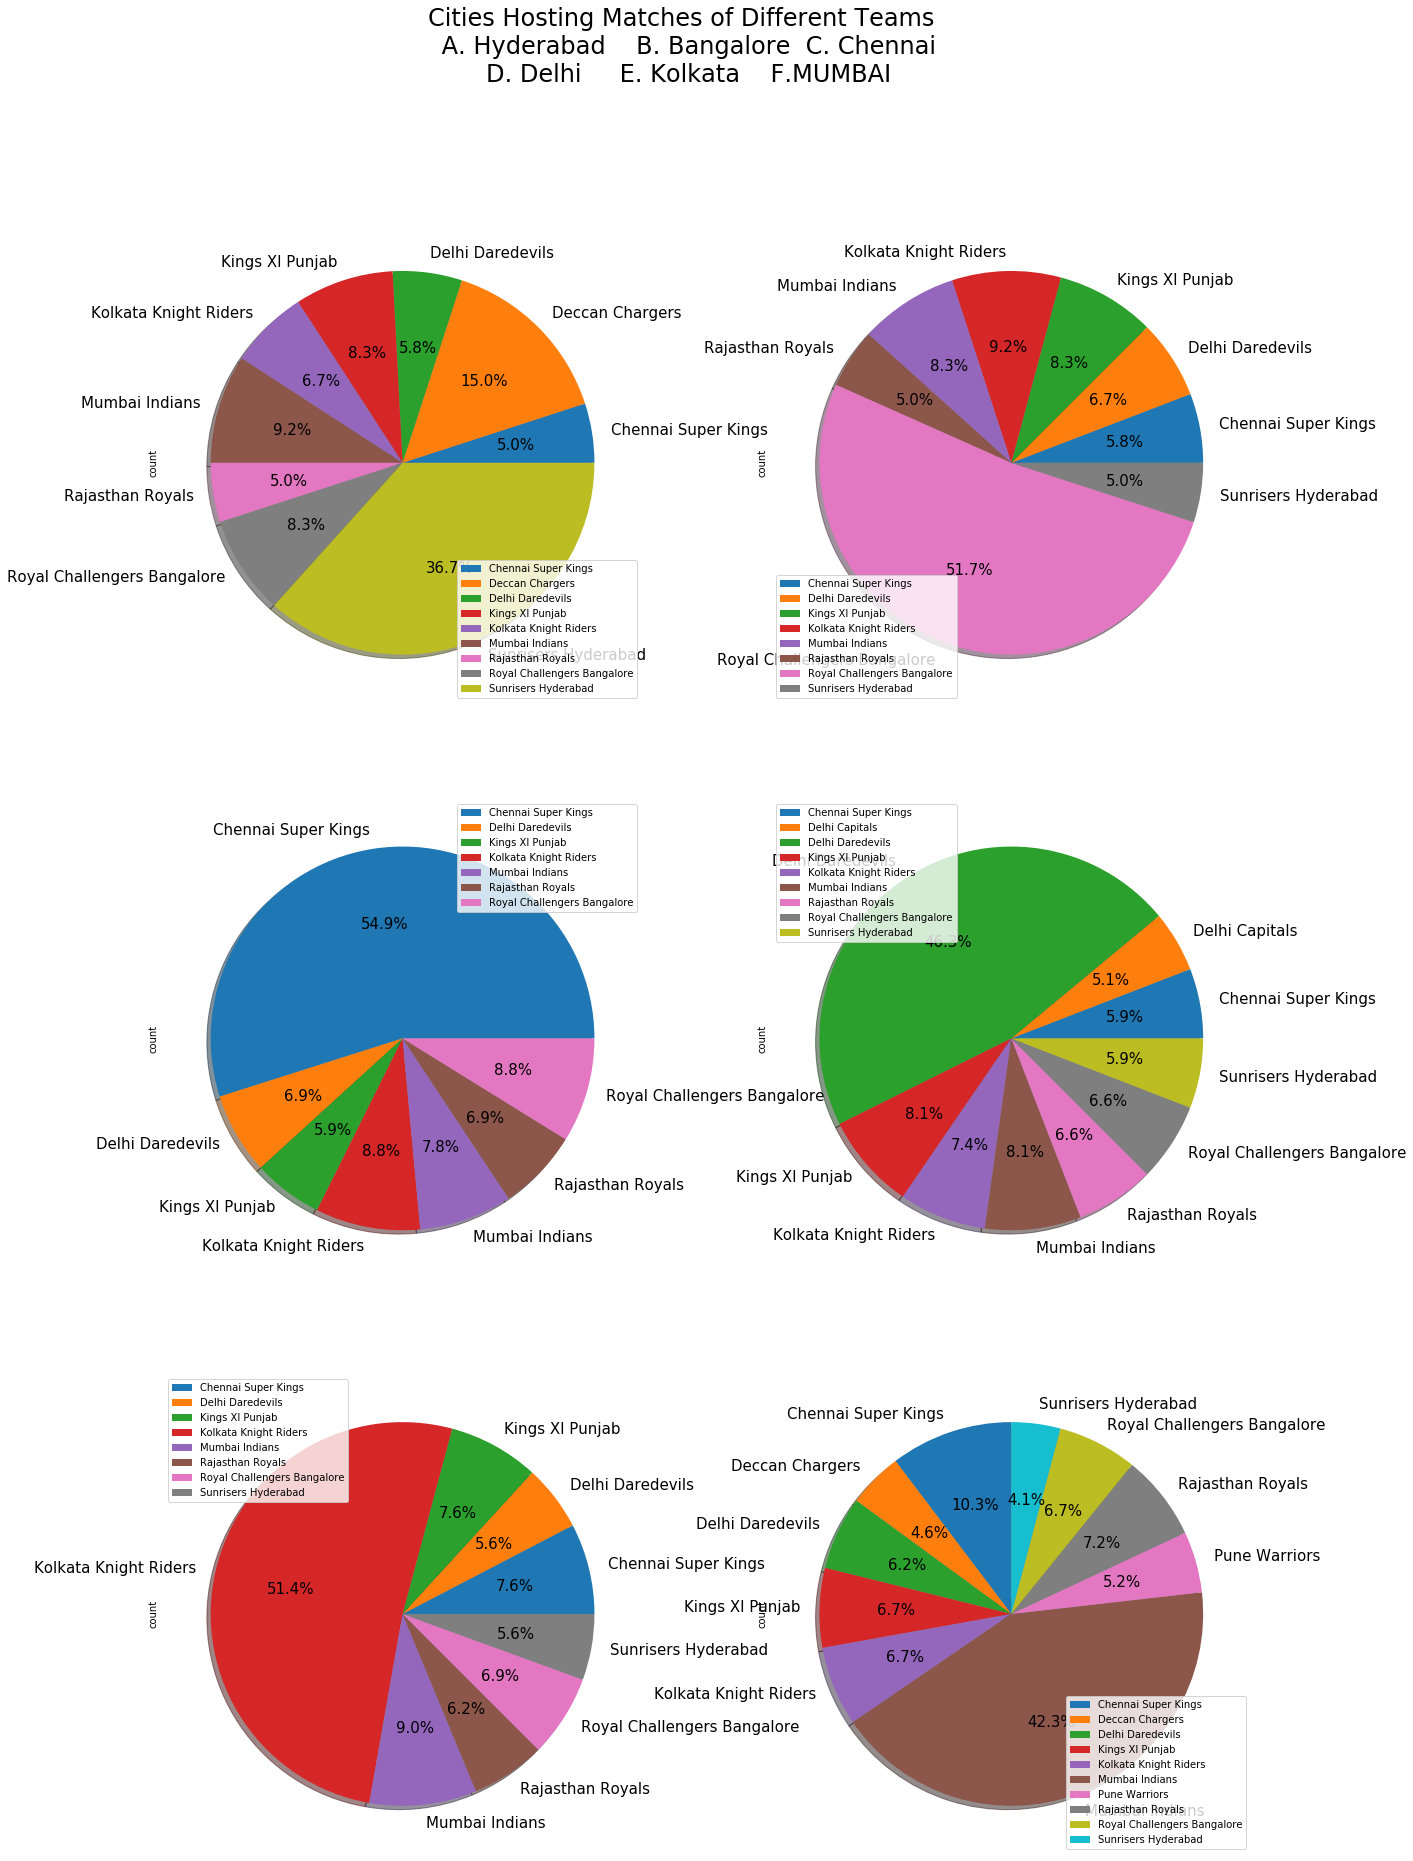

In [15]:
plt.rcParams["figure.figsize"][0] = 20
plt.rcParams["figure.figsize"][1] = 30
fig, axs = plt.subplots(3,2)

plt.suptitle("Cities Hosting Matches of Different Teams  \n "
             "A. Hyderabad    B. Bangalore  C. Chennai \n"
             "D. Delhi     E. Kolkata    F.MUMBAI", fontsize = 24)
team_city1.plot(kind = 'pie' , subplots = True, ax = axs[2][1], autopct = "%1.1f%%", shadow= True, startangle=90, fontsize = 15)
team_city2.plot(kind = 'pie' , subplots = True, ax = axs[0][1],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city3.plot(kind = 'pie' , subplots = True, ax = axs[1][0],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city4.plot(kind = 'pie' , subplots = True, ax = axs[1][1],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city5.plot(kind = 'pie' , subplots = True, ax = axs[2][0],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
team_city6.plot(kind = 'pie' , subplots = True, ax = axs[0][0],  autopct = "%1.1f%%", shadow= True, fontsize = 15)
plt.show()

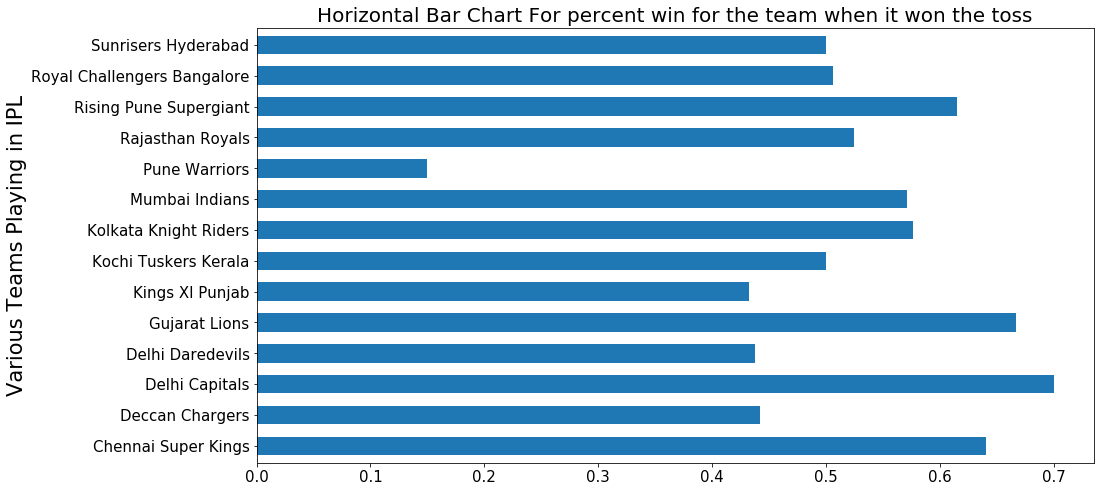

In [16]:
win_game = matches[matches['toss_winner'] == matches['winner']]
toss_win = pd.crosstab(index = win_game['winner'], columns = 'count')
toss_all = pd.crosstab(index = matches['toss_winner'], columns = 'count')
toss_all['won_match'] = toss_win['count']
toss_all['percent'] = toss_win['count'] /toss_all['count']
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 8
toss_all['percent'].plot(kind = 'barh', width = 0.6, fontsize = 15)
plt.ylabel("Various Teams Playing in IPL", fontsize =21)
plt.title("Horizontal Bar Chart For percent win for the team when it won the toss" , fontsize = 20)
plt.show()

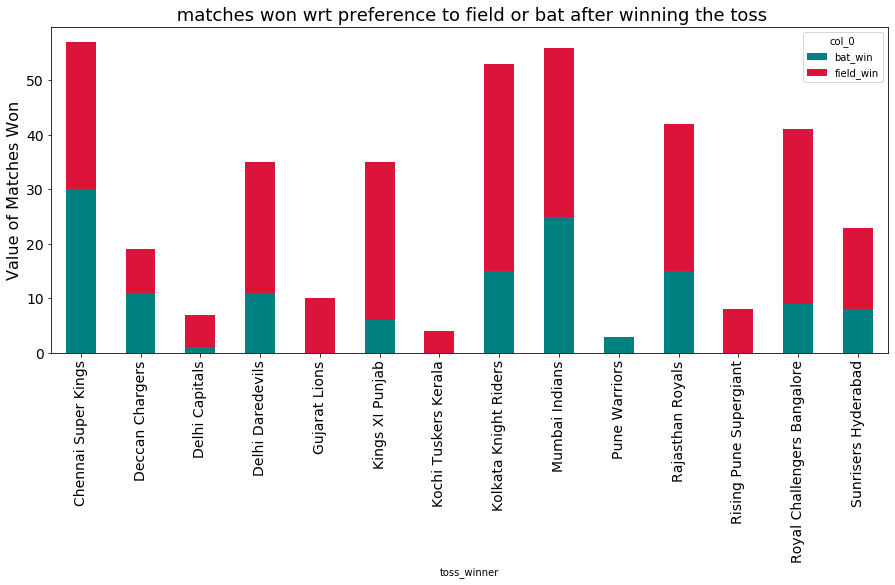

In [17]:
win_game.head(4)
field_win = win_game[win_game['toss_decision'] == 'field']
bat_win = win_game[win_game['toss_decision'] == 'bat']
bat = pd.crosstab(index = bat_win['winner'] , columns = 'count')
field = pd.crosstab(index = field_win['winner'], columns = 'count')
toss_all['bat_win'] = bat['count']
toss_all['field_win'] = field['count']
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 6
toss_all[['bat_win', 'field_win']].plot(kind = 'bar', stacked = True, fontsize = 14, color = ['teal', 'crimson'])
plt.title(" matches won wrt preference to field or bat after winning the toss", fontsize = 18)
plt.ylabel("Value of Matches Won", fontsize = 16)
plt.show()

             Player  count
18         CH Gayle     21
90   AB de Villiers     20
23         MS Dhoni     17
29        DA Warner     17
30        RG Sharma     17
55        YK Pathan     16
52        SR Watson     15
21         SK Raina     14
25        G Gambhir     13
48       MEK Hussey     12
150       AM Rahane     12
138         V Kohli     12
74         A Mishra     11
184      AD Russell     11
53         V Sehwag     11
36         DR Smith     11
11       KA Pollard     10
98        JH Kallis     10
62         SE Marsh      9
43        AT Rayudu      9
10        SP Narine      9


Text(0.5, 1.0, 'Top 15 Cricketers who have been Man of the Matches')

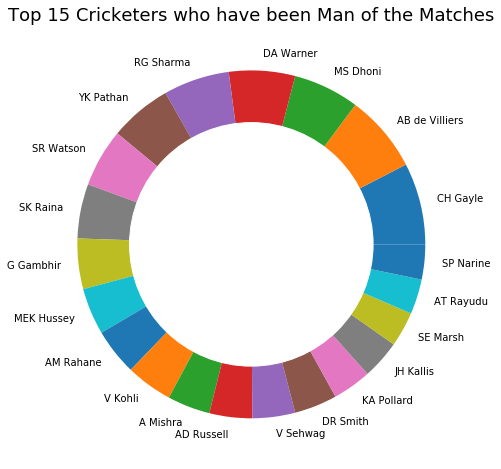

In [18]:

player = matches['player_of_match']
from collections import Counter
count = Counter(player).values()
list1 = pd.DataFrame({'Player' :matches['player_of_match'].unique()})
list1['count'] = count
list1 = list1[list1['count'] > 8].sort_values(by = 'count', ascending = False)
print(list1)
plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 8
plt.pie(list1['count'], labels = list1['Player'], wedgeprops = {'linewidth' : 0, 'edgecolor' : 'white'})
my_circle = plt.Circle(( 0,0) , 0.7 , color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Top 15 Cricketers who have been Man of the Matches", fontsize= 18)

Text(0, 0.5, 'Runs By Which a Team has won')

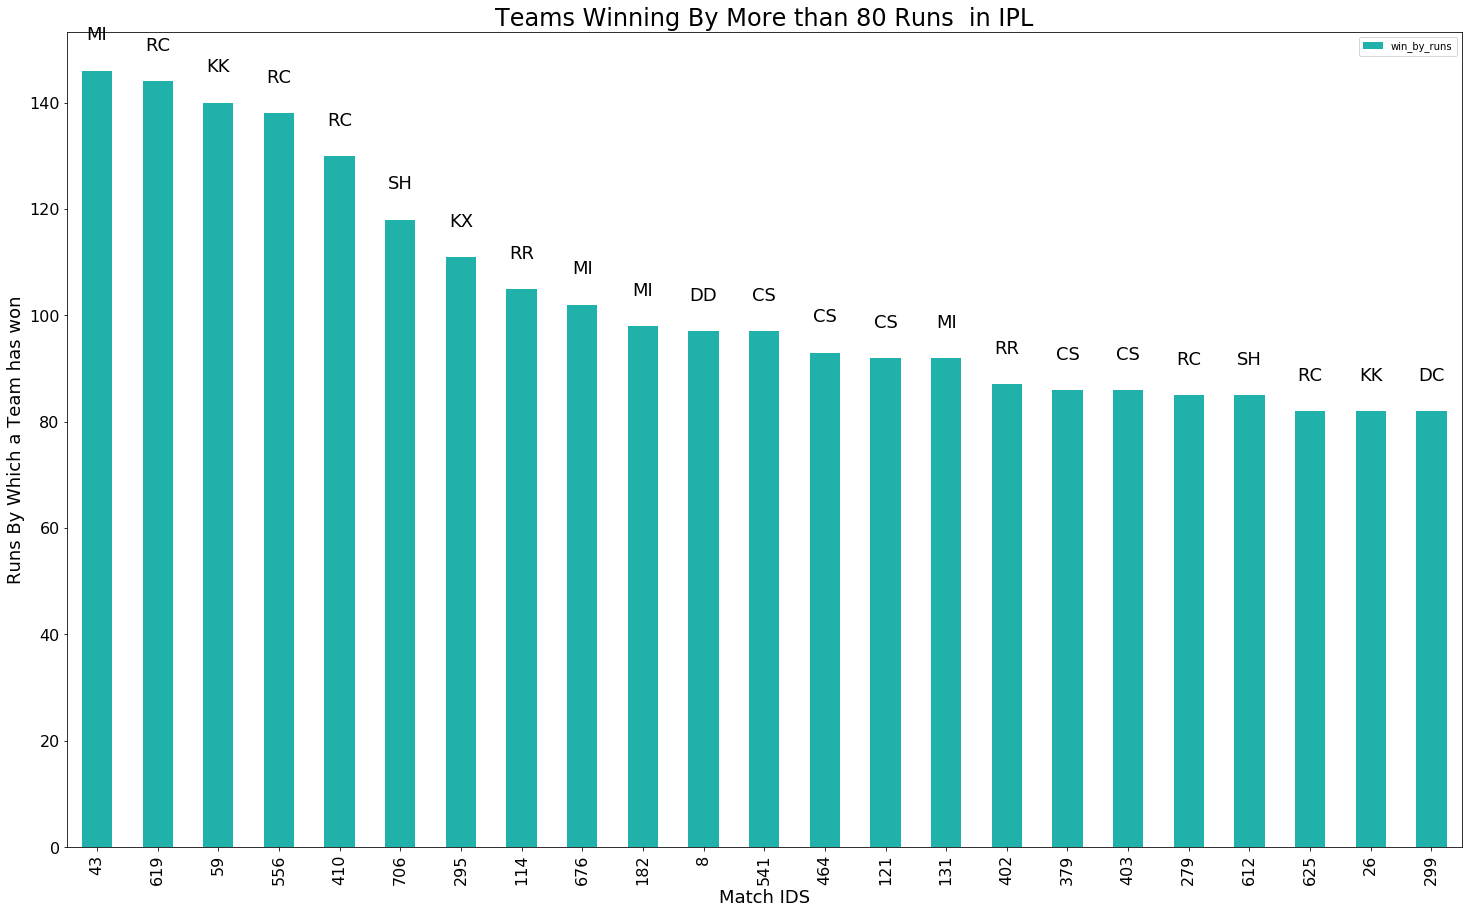

In [19]:
plt.rcParams["figure.figsize"][0] = 25
plt.rcParams["figure.figsize"][1] = 15
win = matches[['win_by_runs','winner']]
win = win.sort_values(by = 'win_by_runs', ascending = False)
win = win[win['win_by_runs'] > 80]

list1 = win['winner']
list2 =[i.split()[0][0] for i in list1]
list3 =[j.split()[1][0] for j in list1]
list4 = []
i = 0
while i < 23: 
    list4.append(list2[i] + list3[i])
    i = i  + 1


ax =  win.plot(kind = 'bar' , color = 'lightseagreen', fontsize = 16)
rects = ax.patches
labels = ["%s" % i for i in list4]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize = 18)
plt.title("Teams Winning By More than 80 Runs  in IPL", fontsize = 24)
plt.xlabel("Match IDS", fontsize = 18)
plt.ylabel("Runs By Which a Team has won", fontsize = 18)

Text(0, 0.5, 'Wickets By Which Team has Won')

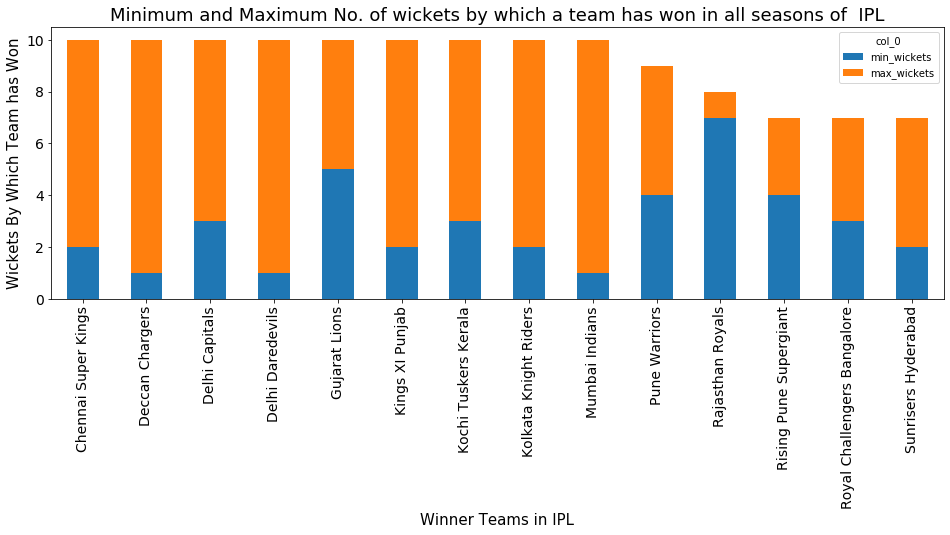

In [20]:
plt.rcParams["figure.figsize"][0] = 16
plt.rcParams["figure.figsize"][1] = 5
win2 = matches[['win_by_wickets','winner']]
win2 = win2.sort_values(by = 'win_by_wickets', ascending = False)
win2 = win2[win2['win_by_wickets'] > 0]
win_field = pd.crosstab(index = win2['winner'] , columns = 'count')
list1 = []
list1 = win2['winner'].unique()
min_wicket = []
max_wicket = []
diff_wicket = []
i = 0 
while i < 14: 
    min_wicket.append(win2[win2['winner'] == list1[i]]['win_by_wickets'].min())
    max_wicket.append(win2[win2['winner'] == list1[i]]['win_by_wickets'].max())
    diff_wicket.append(max_wicket[i] - min_wicket[i])
    i = i + 1

win_field['max_wickets'] = diff_wicket
win_field['min_wickets'] = min_wicket
win_field[['min_wickets' ,'max_wickets']].plot(kind = 'bar', stacked = True, fontsize = 14)
plt.title("Minimum and Maximum No. of wickets by which a team has won in all seasons of  IPL" , fontsize = 18)
plt.xlabel("Winner Teams in IPL", fontsize = 15)
plt.ylabel("Wickets By Which Team has Won" , fontsize = 15)

In [21]:

s = deliveries.match_id.replace(matches.set_index('id')['season'])
deliveries['season'] = s
deliveries['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

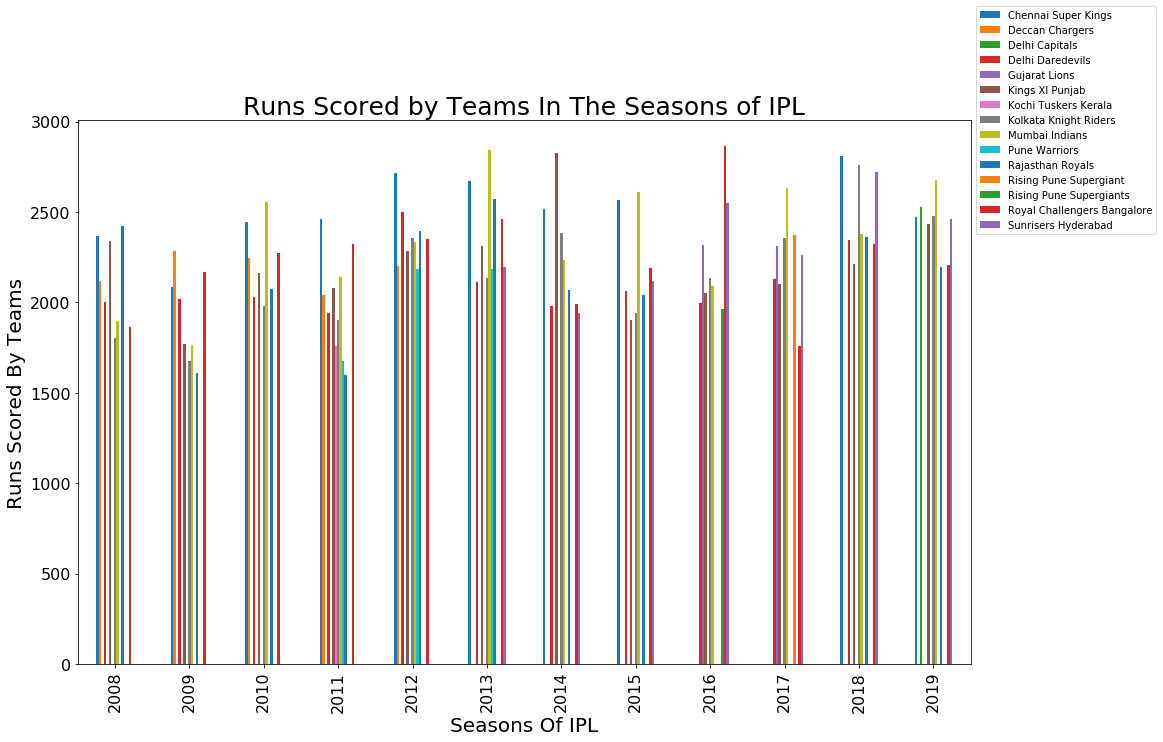

In [22]:
fig, ax = plt.subplots(figsize=(16,10))
deliveries_by_season = deliveries.groupby(['season' , 'batting_team']).sum()
deliveries_by_season['batsman_runs'].unstack().plot(kind = 'bar',ax = ax, width = 0.5, fontsize = 16)
plt.title("Runs Scored by Teams In The Seasons of IPL" , fontsize = 25)
plt.ylabel("Runs Scored By Teams" ,fontsize = 20)
plt.xlabel("Seasons Of IPL", fontsize = 20)
ax.legend(loc='center left', bbox_to_anchor=(1, 1))

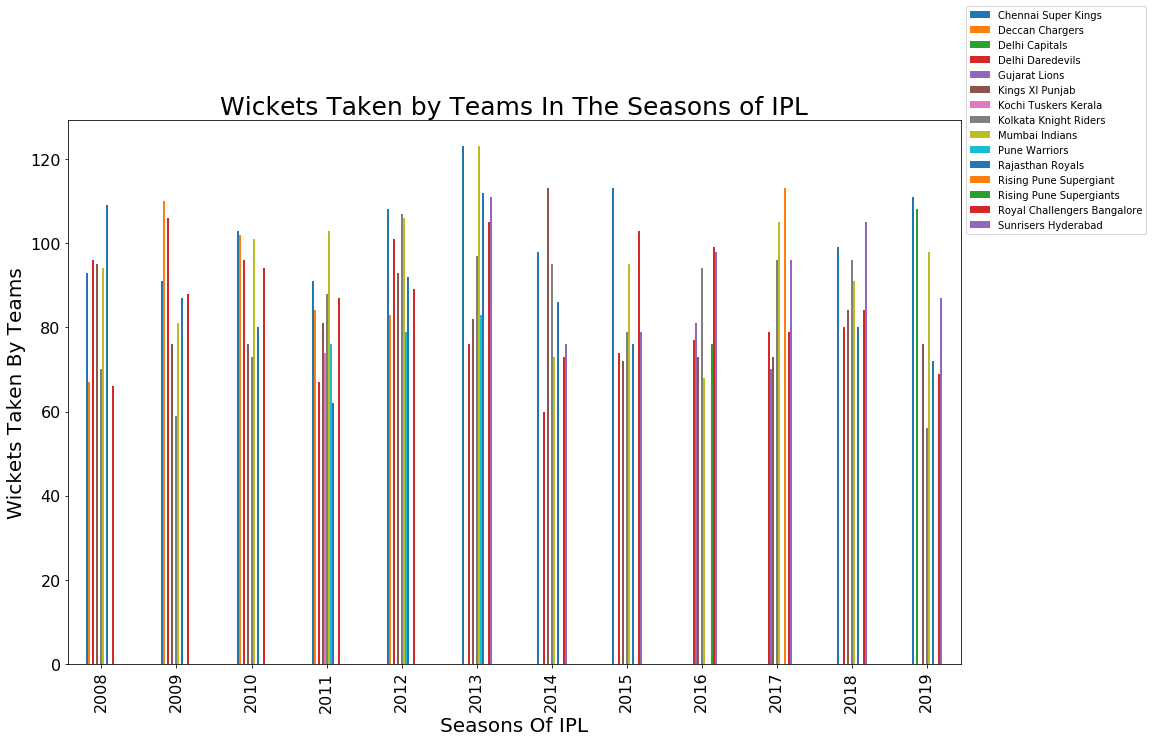

In [23]:
deliveries['player_dismissed_no'] = deliveries['player_dismissed']
deliveries['player_dismissed_no'] = np.where(deliveries['player_dismissed_no'].isnull(), 0 , 1)
wickets_by_season = deliveries.groupby(['season' , 'bowling_team']).sum()
fig, ax = plt.subplots(figsize=(16,10))
wickets_by_season['player_dismissed_no'].unstack().plot(kind = 'bar',ax = ax, width = 0.4, fontsize = 16)
plt.title("Wickets Taken by Teams In The Seasons of IPL" , fontsize = 25)
plt.ylabel("Wickets Taken By Teams" ,fontsize = 20)
plt.xlabel("Seasons Of IPL", fontsize = 20)
ax.legend(loc='center left', bbox_to_anchor=(1, 1))

In [24]:
a = deliveries.groupby(['batsman','season']).sum()
bat = a[a['batsman_runs'] > 10].sort_values(by = 'season')
batsman_all = bat.groupby(level=['season' , 'batsman']).max()
season_batsman = batsman_all.groupby(level = ['season']).max()
i = 2008 
batsman_array = []
while i < 2020: 
    season_which = batsman_all.groupby(['season']).get_group(i)
    runs_total = season_which[season_which['total_runs'] == season_batsman['total_runs'][i]]
    batsman = runs_total.groupby('batsman').groups.keys()
    for key in batsman:
        batsman_array.append(key)
    i = i + 1
batsman_array

['SE Marsh',
 'ML Hayden',
 'SR Tendulkar',
 'CH Gayle',
 'CH Gayle',
 'CH Gayle',
 'RV Uthappa',
 'DA Warner',
 'V Kohli',
 'DA Warner',
 'KS Williamson',
 'DA Warner']

Text(0, 0.5, 'Runs Scored By the Highest Scorers')

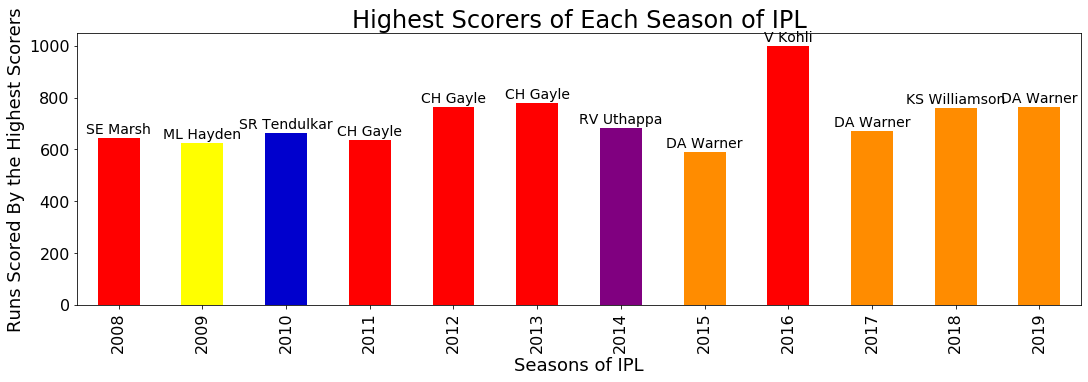

In [25]:
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 5
ax =  season_batsman['total_runs'].plot(kind = 'bar' , color = ['red','yellow','mediumblue','red','red','red','purple','darkorange','red','darkorange','darkorange','darkorange'] ,fontsize = 16)
rects = ax.patches
labels = ["%s" % i for i in batsman_array]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize = 14)
plt.title("Highest Scorers of Each Season of IPL", fontsize = 24)
plt.xlabel("Seasons of IPL", fontsize = 18)
plt.ylabel("Runs Scored By the Highest Scorers", fontsize = 18)

In [26]:
field = deliveries.groupby(['season' , 'bowler']).sum()
bowlers_all = field.groupby(level = ['season' , 'bowler']).max()
bowlers_max = field.groupby(level = ['season']).max()
max_wickets = bowlers_max['player_dismissed_no']
i = 2008
bowler_array = []
while i < 2020:
    season_b = bowlers_all.groupby(['season']).get_group(i)
    bowler_find = season_b[season_b['player_dismissed_no'] == max_wickets[i]]
    bowlers = bowler_find.groupby(['bowler']).groups.keys()
    for key in bowlers: 
        bowler_array.append(key)
    i = i + 1
bowler_array

['Sohail Tanvir',
 'RP Singh',
 'PP Ojha',
 'SL Malinga',
 'M Morkel',
 'DJ Bravo',
 'MM Sharma',
 'DJ Bravo',
 'B Kumar',
 'B Kumar',
 'AJ Tye',
 'K Rabada']

Text(0, 0.5, 'Wickets Taken By the Bowlers')

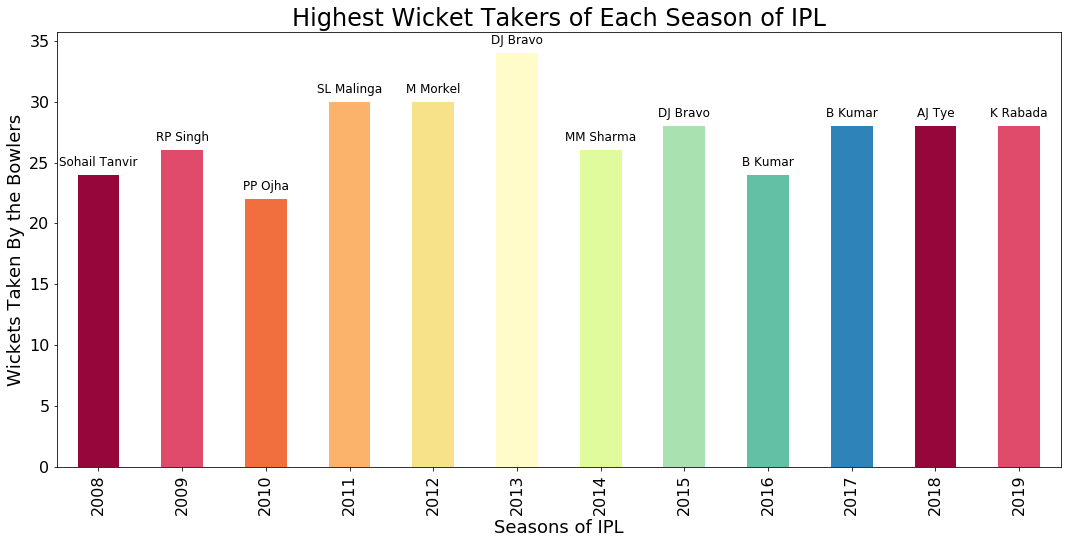

In [27]:
plt.rcParams['figure.figsize'][1] = 8
ax =  max_wickets.plot(kind = 'bar' , color = ['#95063B', '#E04B6C' , '#F16E3E' , '#FBB36C' , '#F7E189' , 
                                               '#FFFCCA' , '#E0FB9C','#A9E2B0' , '#63C0A5' , '#2E84B9']  , fontsize = 16)
rects = ax.patches
labels = ["%s" % i for i in bowler_array]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height +0.5, label,
            ha='center', va='bottom', fontsize = 12)
plt.title("Highest Wicket Takers of Each Season of IPL", fontsize = 24)
plt.xlabel("Seasons of IPL", fontsize = 18)
plt.ylabel("Wickets Taken By the Bowlers", fontsize = 18)

In [28]:
special4 = deliveries[deliveries['batsman_runs'] == 4]
special6 = deliveries[deliveries['batsman_runs']== 6]
total4   = special4.groupby(['season' , 'batsman']).count()
total6   = special6.groupby(['season' , 'batsman']).count()
high4    = total4.groupby(level=['season', 'batsman']).max()
high6    = total6.groupby(level=['season', 'batsman']).max()
batsman4 = high4.groupby(level = ['season']).max()
batsman6 = high6.groupby(level = ['season']).max()
i = 2008 
batsman_array4 = []
batsman_array6 = []
while i < 2018:
    season4_which = high4.groupby(['season']).get_group(i)
    batsman4_which = season4_which[season4_which['batsman_runs'] == batsman4['batsman_runs'][i]]
    bat4 = batsman4_which.groupby('batsman').groups.keys()
    for key4 in bat4:
        batsman_array4.append(key4)
    season6_which = high6.groupby(['season']).get_group(i)
    batsman6_which = season6_which[season6_which['batsman_runs'] == batsman6['batsman_runs'][i]]
    bat6 = batsman6_which.groupby('batsman').groups.keys()
    for key6 in bat6:
        batsman_array6.append(key6)
    i = i + 1
batsman_array6.pop()
dataframe = pd.DataFrame({'Number of 4s': batsman4['batsman_runs']  , 'Number of 6s': batsman6['batsman_runs'] })
final_list = batsman_array4 + batsman_array6
dataframe

,Number of 4s,Number of 6s
season,,
2008,68,31
2009,60,29
2010,86,27
2011,67,44
2012,73,59
2013,81,52
2014,74,36
2015,65,38
2016,88,38


Text(0, 0.5, "No. of 4's and 6's by Batsman")

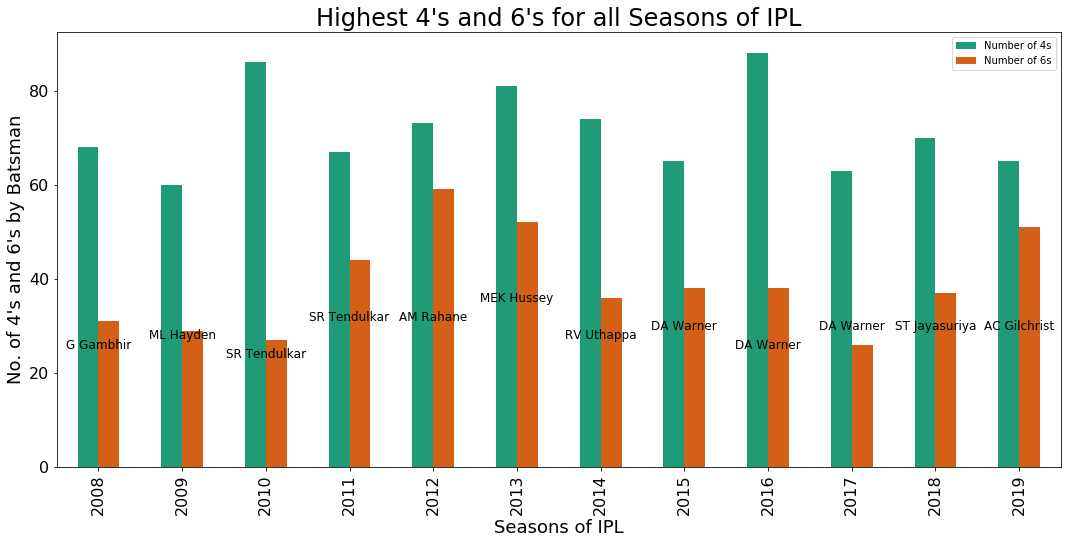

In [29]:
plt.rcParams['figure.figsize'][1] = 8
ax =  dataframe[['Number of 4s' , 'Number of 6s']].plot(kind = 'bar'  , stacked = False,  fontsize = 16, color = ['#1F9C77' , '#D45F16'])
labels = ["%s" % i for i in final_list]
rect =  ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height +0.5, label,
            ha='center', va='bottom', fontsize = 12)
plt.title("Highest 4's and 6's for all Seasons of IPL", fontsize = 24)
plt.xlabel("Seasons of IPL", fontsize = 18)
plt.ylabel("No. of 4's and 6's by Batsman", fontsize = 18)

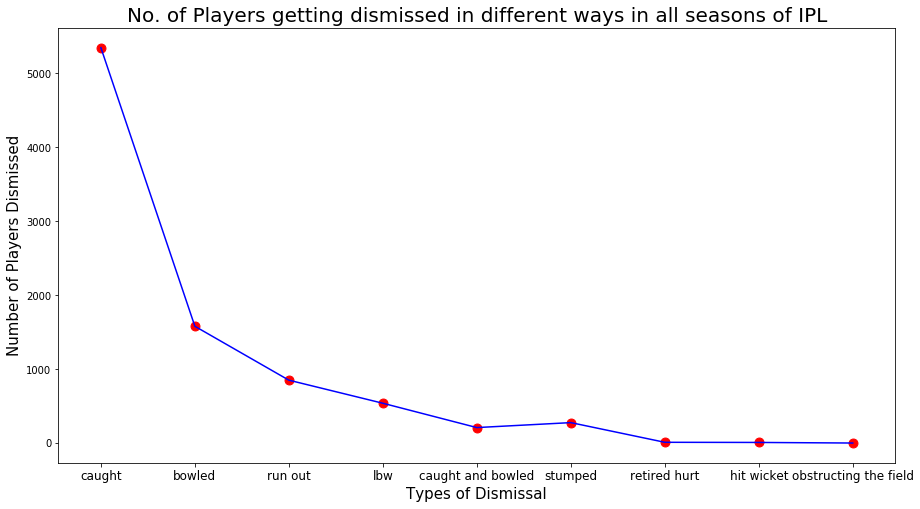

In [30]:
plt.rcParams['figure.figsize'][0] = 15
plt.rcParams['figure.figsize'][1] = 8
dismissal = deliveries.dropna(subset =  ['dismissal_kind'])
dismis = dismissal['dismissal_kind']
dismissal_type = pd.crosstab(index = dismis, columns = 'count')
dataframe = pd.DataFrame({'Number of Each Type':dismissal_type['count']})
x = np.arange(1,10,1)
y = []
xtick = [i for i in dismis.unique()]
for a in xtick:
    y.append(dataframe['Number of Each Type'][a])
plt.xticks(x,xtick, fontsize = 12)
plt.scatter(x,y,color = 'red',marker = 'o' , s =80)
plt.plot(x,y,color = 'blue')
plt.title('No. of Players getting dismissed in different ways in all seasons of IPL' , fontsize = 20)
plt.xlabel("Types of Dismissal",fontsize = 15)
plt.ylabel("Number of Players Dismissed" , fontsize = 15)
plt.show()

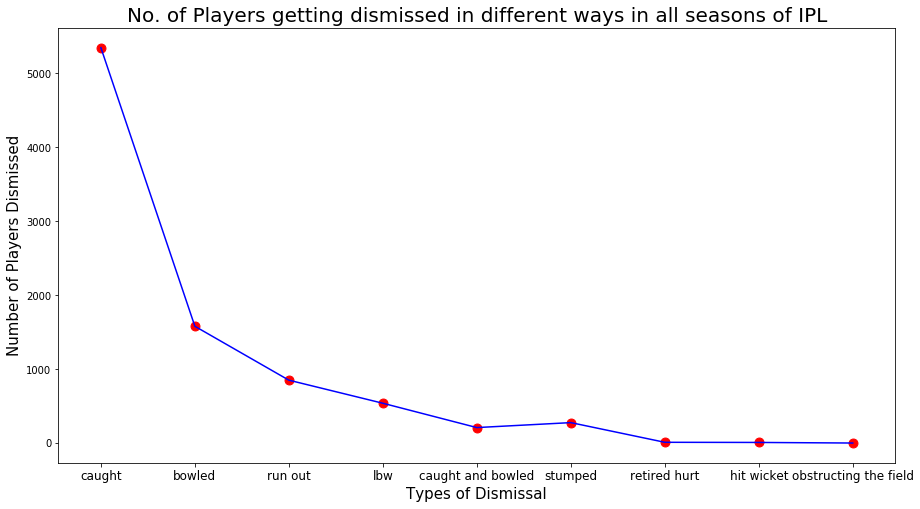

In [31]:
plt.rcParams['figure.figsize'][0] = 15
plt.rcParams['figure.figsize'][1] = 8
dismissal = deliveries.dropna(subset =  ['dismissal_kind'])
dismis = dismissal['dismissal_kind']
dismissal_type = pd.crosstab(index = dismis, columns = 'count')
dataframe = pd.DataFrame({'Number of Each Type':dismissal_type['count']})
x = np.arange(1,10,1)
y = []
xtick = [i for i in dismis.unique()]
for a in xtick:
    y.append(dataframe['Number of Each Type'][a])
plt.xticks(x,xtick, fontsize = 12)
plt.scatter(x,y,color = 'red',marker = 'o' , s =80)
plt.plot(x,y,color = 'blue')
plt.title('No. of Players getting dismissed in different ways in all seasons of IPL' , fontsize = 20)
plt.xlabel("Types of Dismissal",fontsize = 15)
plt.ylabel("Number of Players Dismissed" , fontsize = 15)
plt.show()

In [33]:
caught = deliveries[(deliveries['dismissal_kind'] == "caught and bowled") | (deliveries['dismissal_kind'] == 'caught')]
fielder = caught.groupby(['season' , 'fielder']).count()
fielders_all = fielder.groupby(level = ['season' , 'fielder']).max()
season_catch = fielder.groupby(level = ['season']).max()
catches = season_catch['player_dismissed_no']
i = 2008
fielder_array = []
while i < 2020:
    season_f = fielders_all.groupby(['season']).get_group(i)
    fielder_find = season_f[season_f['player_dismissed_no'] == catches[i]]
    fielders = fielder_find.groupby(['fielder']).groups.keys()
    for key in fielders: 
        fielder_array.append(key)
    i = i + 1
catches

season
2008    10
2009    13
2010    12
2011    17
2012    14
2013    15
2014    14
2015    14
2016    19
2017    15
2018    14
2019    18
Name: player_dismissed_no, dtype: int64

Text(0.5, 0, 'Catches Taken By the Bowlers')

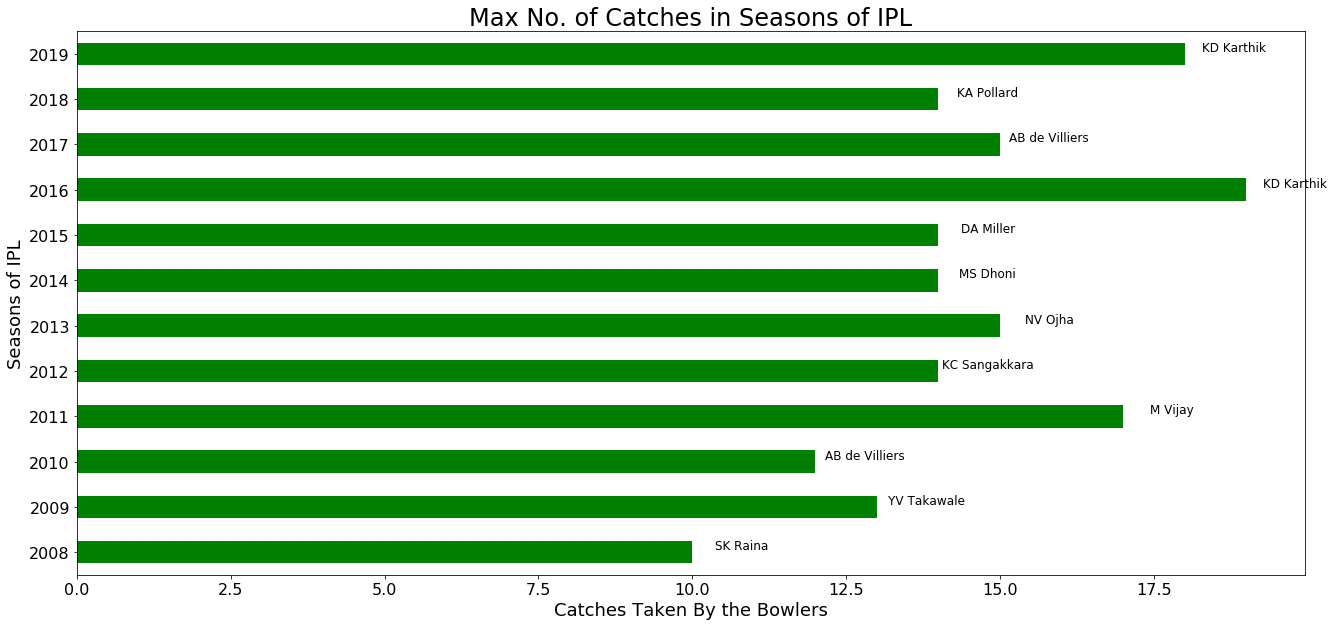

In [34]:
plt.rcParams['figure.figsize'][0] = 22
plt.rcParams['figure.figsize'][1] = 10
ax =  catches.plot(kind = 'barh' , color = 'green' , fontsize = 16)
rects = ax.patches
labels = ["%s" % i for i in fielder_array]
for rect, label in zip(rects, labels):
    ax.text(rect.get_width() + 0.8, rect.get_y() + rect.get_height()/2, label,
            ha='center', va='bottom', fontsize = 12)
plt.title("Max No. of Catches in Seasons of IPL", fontsize = 24)
plt.ylabel("Seasons of IPL", fontsize = 18)
plt.xlabel("Catches Taken By the Bowlers", fontsize = 18)

In [35]:
runs = deliveries.groupby(['season' , 'over']).sum()
matches = deliveries.groupby(['season'])['match_id'].unique()
len(matches[2008])
no_matches = []
for index in matches.index:
    no_matches.append(len(matches[index]))
no_matches_df = pd.DataFrame({"Seasons": matches.index , "No. of Matches": no_matches})
average_runs = pd.DataFrame({"Total Runs":runs['total_runs'] })
no_matches_df['No. of Matches']

0     58
1     57
2     60
3     73
4     74
5     76
6     60
7     59
8     60
9     59
10    60
11    60
Name: No. of Matches, dtype: int64

Text(0.5, 1.0, 'Average Scores Per Ball In Each Season')

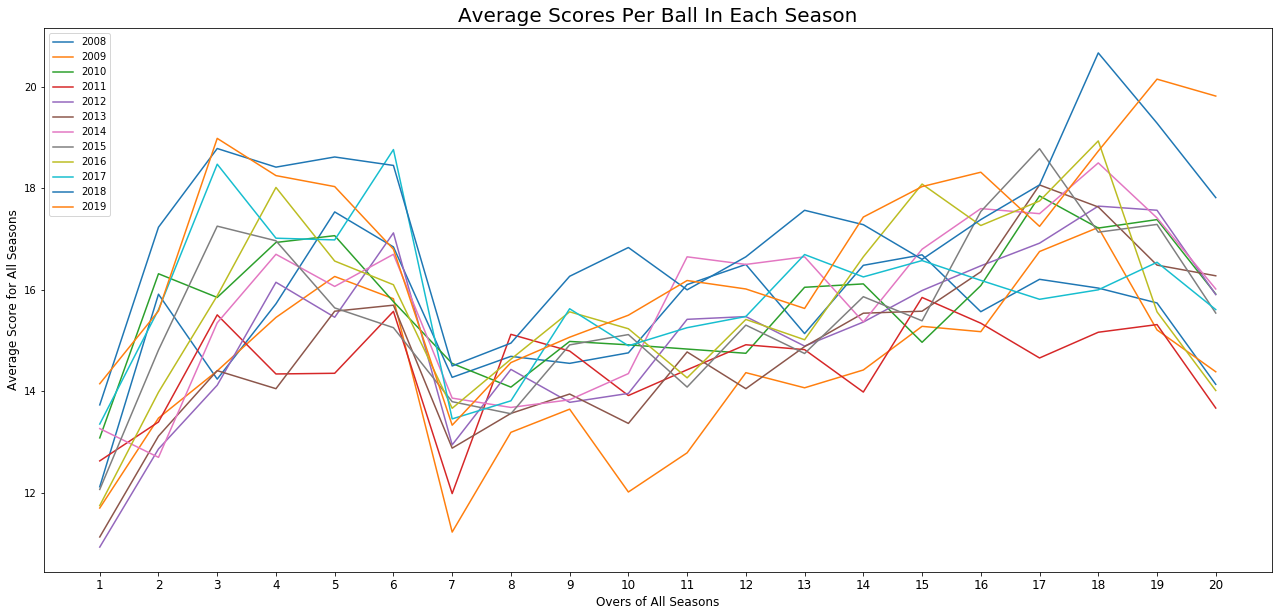

In [36]:
import warnings
i = 2008 
warnings.filterwarnings('ignore')
season_total = pd.DataFrame({})
while i < 2020:
    new = "season_over_%d"%i
    new = average_runs.groupby('season').get_group(i)
    new['Average_runs'] = new['Total Runs']/no_matches_df['No. of Matches'][i - 2008]
    new["Average_runs"].plot(label = i)
    i = i + 1
 

x = range(0,20)
xtick = range(1,21)


plt.xticks(x, xtick, fontsize= 12)
plt.xlabel("Overs of All Seasons" , fontsize = 12)
plt.ylabel("Average Score for All Seasons" , fontsize = 12)
plt.legend()
plt.title("Average Scores Per Ball In Each Season" , fontsize = 20)

Text(0, 0.5, 'Runs Scored by the Top Batsman')

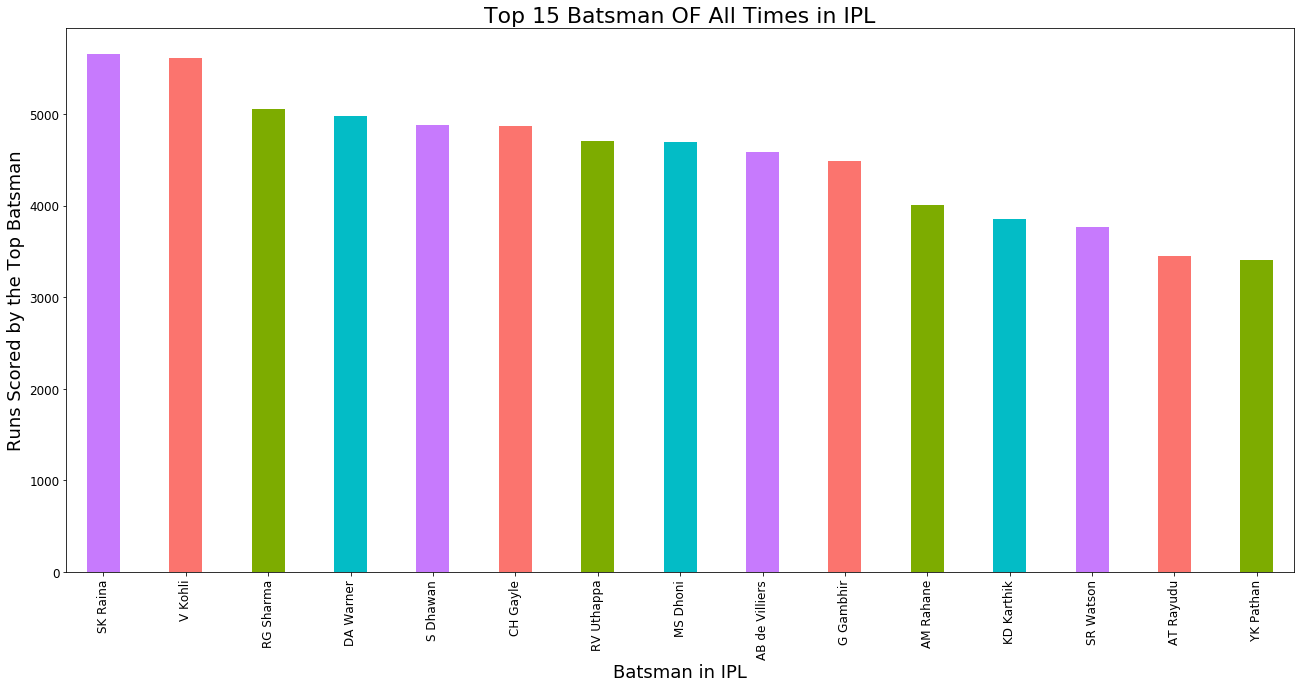

In [37]:
batsmen_order = deliveries.groupby(['batsman']).sum().sort_values(by = 'total_runs' , ascending = False)
batsmen15 = batsmen_order.head(15)
batsmen15['total_runs'].plot(kind = 'bar', color = ['#C77AFD' , '#FB746E' , '#7DAC00' , '#03BCC6'],width= 0.4, fontsize = 12)
plt.rcParams['figure.figsize'][0] = 15
plt.rcParams['figure.figsize'][1] = 10
plt.title("Top 15 Batsman OF All Times in IPL" ,fontsize = 22)
plt.xlabel("Batsman in IPL", fontsize = 18)
plt.ylabel("Runs Scored by the Top Batsman" , fontsize = 18)

Text(0, 0.5, 'Wickets Taken by the Top Bowlers')

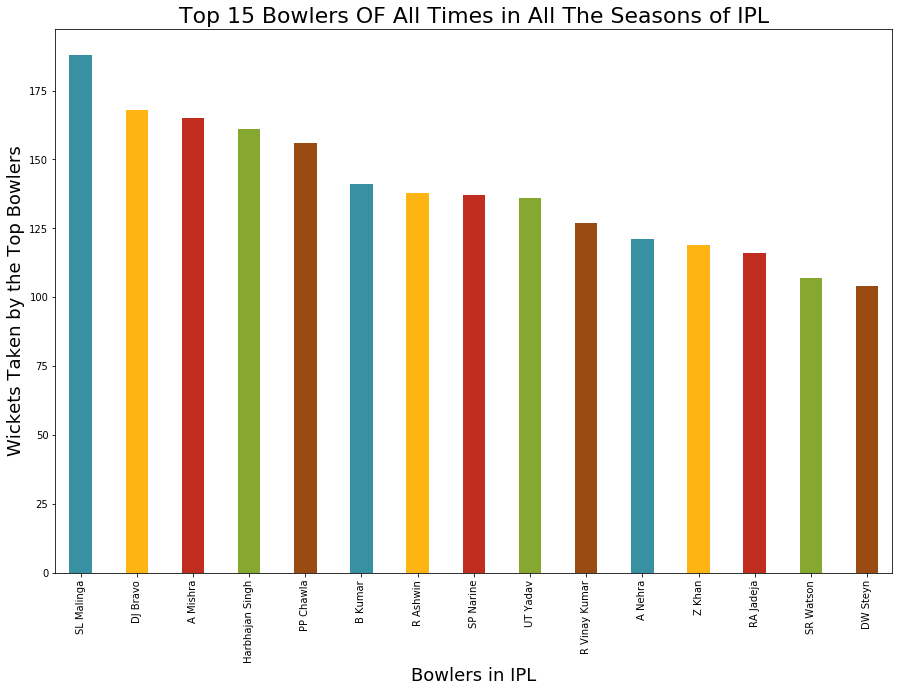

In [38]:
bowlers_order = deliveries.groupby(['bowler']).sum().sort_values(by = 'player_dismissed_no', ascending = False)
bowlers15 = bowlers_order.head(15)
bowlers15['player_dismissed_no'].plot(kind = 'bar', color = ['#3791A3' , '#FEB412' , '#C02D1F' , '#87A830' , '#994B12'] , width = 0.4)
plt.title("Top 15 Bowlers OF All Times in All The Seasons of IPL" ,fontsize = 22)
plt.xlabel("Bowlers in IPL", fontsize = 18)
plt.ylabel("Wickets Taken by the Top Bowlers" , fontsize = 18)

In [75]:
import numpy as np 
import pandas as pd 


In [76]:
matches=pd.read_csv('matches.csv')
matches.info()
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               570 non-null object
date               577 non-null object
team1              577 non-null object
team2              577 non-null object
toss_winner        577 non-null object
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             574 non-null object
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 81.3+ KB


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,4/20/2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,4/20/2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [78]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,5/21/2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,4/29/2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,5/17/2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [79]:
matches['winner'].fillna('Draw', inplace=True)

In [80]:
matches.loc[241,'winner']

'Draw'

In [81]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)


matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [82]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [83]:
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,4/19/2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,4/19/2014,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,4/23/2014,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,4/25/2014,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,4/25/2014,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,4/28/2014,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,4/30/2014,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [84]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               577 non-null object
date               577 non-null object
team1              577 non-null int64
team2              577 non-null int64
toss_winner        577 non-null int64
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             577 non-null int64
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(9), object(8)
memory usage: 81.3+ KB


In [85]:

#team_match_total=matches.groupby(["team1"]).size()+matches.groupby(["team2"]).size()
#print(team_match_total.get_value(1))
xx=matches.groupby(["toss_winner"]).size()
print(xx.get_value(1))
yy=matches.groupby(["winner"]).size()
print(yy.get_value(1))

74
80


C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [86]:

dicVal = encode['winner']
print(dicVal['MI']) 
print(list(dicVal.keys())[list(dicVal.values()).index(1)])

1
MI


In [87]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5


In [88]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


In [89]:
df["city"].unique()


array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur'], dtype=object)

In [16]:
df["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [90]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  3  1  0  4  2  6  5  7  6  1  3  5
  0  7  3  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  3  8  8  8  8  9 10  8 10  8 10 10  9  8 10
  9 11 10 10 11 11 12 10  9 13  9 13 12 10 10 11 11 11 12 14 14  9 13 14
 11 11 10 10 10 15  9 13 13 15 11 13 10 10 11 11 11 13 13  3  3  1  4  7
 16  0  4  2  0  2 17 16  3 17  7  3  0  1  3 16  1  0 16  3  2  3  7  2
  4  1  7  3  4  2 18  7  5  4  0  1 18  0  2  5 18  3  7  5  7 19  0  4
 19  2  4  3  3  3  3  7  6 20  2  3  4  5  0  1  3  6  5  3  7  6  3  4
 20  2  3  4  1  3  4  2  6  5  7  2  3 20  2  5  0 20  4  5  7  3  2  6
  7  3 20  6  0  4  3  0  1  5  6  1  5  7 21  0  3 19 21  3 19  7  3  3
 19  2  0  4  3  3  7  7  7  4  3  5  0 22  5 23 22  0  2  3  7  1  4  2
 23  4  0  3  5  0  1  6  7  1  7  2  3 17  5 23  1 23  2  7  4  2  3  7
 17  5  0 23  7  4  1  3  0  2 23  6  3  5 23  4  7  5  1  0  4  2  3 19
  2  6 19 23  6  5 23  0  7  7  4  0  6  2  7 23  6

In [91]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  8  1  0  4  2  6  5  7  6  1  8  5
  0  7  8  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  8  9  9  9  9 10 11  9 11  9 11 11 10  9 11
 10 12 11 11 12 12 13 11 10 14 10 14 13 11 11 12 12 12 13 15 15 10 14 15
 12 12 11 11 11 16 10 14 14 16 12 14 11 11 12 12 12 14 14  8 17  1  4  7
 18  0  4  2  0  2 19 18 17 19  7 17  0  1 17 18  1  0 18  8  2 17  7  2
  4  1  7 17  4  2 20  7  5  4  0  1 20  0  2  5 20 17  7  5  7 21  0  4
 21  2  4  8  8  8  8  7  6 22  2  8  4  5  0  1  8  6  5  3  7  6  8  4
 22  2  3  4  1  3  4  2  6  5  7  2  8 22  2  5  0 22  4  5  7  3  2  6
  7  8 22  6  0  4  3  0  1  5  6  1  5  7 23  0  3 21 23  8 21  7  8  3
 21  2  0  4  3  3  7  7  7  4  3  5  0 24  5 25 24  0  2  3  7  1  4  2
 25  4  0  3  5  0  1  6  7  1  7  2  3 19  5 25  1 25  2  7  4  2  3  7
 19  5  0 25  7  4  1  3  0  2 25  6  3  5 25  4  7  5  1  0  4  2  3 21
  2  6 21 25  6  5 25  0  7  7  4  0  6  2  7 25  6

In [92]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [93]:

temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 74
KKR -> 69
CSK -> 66
KXIP -> 64
DD -> 64
RR -> 63
RCB -> 61
DC -> 43
SRH -> 30
PW -> 20
KTK -> 8
GL -> 8
RPS -> 7
No of match winners by each team
MI -> 80
CSK -> 79
RCB -> 70
KKR -> 68
KXIP -> 63
RR -> 63
DD -> 56
SRH -> 34
DC -> 29
PW -> 12
GL -> 9
KTK -> 6
RPS -> 5
Draw -> 3


In [97]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 


team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [99]:

from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
...,...,...,...,...,...,...,...
572,7,3,26,1,3,27,3
573,8,3,2,1,3,14,3
574,10,2,9,1,2,8,10
575,8,10,9,1,10,8,10


In [27]:
df.head(10)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
5,9,6,16,0,9,26,6
6,4,7,14,0,4,23,7
7,5,1,7,1,1,15,5
8,4,6,14,1,6,23,6
9,9,1,6,1,1,22,9


In [108]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  

In [109]:
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  5  1  2  6  5  3  3  9  3  5  1  9  5  1  2  6  1  5  1  6  2  5
  3  3  2  9  2  1  3  9  1  6  5  2  1  9  9  1  5  1  1  2  3  2  1  5
  3  3  5  3  2  1  5  6  6  2  3  5  9  5  1  9  5  5  3  5  1  1  5  3
  1  6  1  5  6  6  2  5  1  3  1  1  5  9  5  1  3  6  5  7  2  1  1  2
  1  6  9  5  1  9  1  1  9  5  6  5  2  5  3  6  6  1  1  2  2  9  2  5
  9  5  2  3  3  5  3  3  2  5  9  2  3  9  2  5  5  9  6  1  5  2  5  5
  2  6  5  2  5  5  1  5  6  2  3  5  1  3  5  1  1  2  5  1  5  9  3  2
  9  5  1  2  2  2  2  5  3  6  5 10  2  6  3  9 10  1  1  6  5  6 10  2
  9  5  6  2  9  1  1  9  1  9  9  2 10  7  3  1  3 10  2  9  5  1  9  1
  5  8  9  3  3  2  1  5  9  6  9  9  1  5  9  3  1  9  9  2  5  9  2  1
  3 10  3  1  1  1  1  5  3  2  9  9  3  2  1  6  2  3  3  1  5  9  2  5
  9  2  5  1  5  6  6  5  9  9  5  9  1  2  1  6  6  9  2  5  2  5  1  5
 14  6  3  7  5  7  9  1  3  5  6  9  1  6  6  1  9  9  5  3  1  5  1  9
  3  5  9  9  1  1  1  3  3  5  2  3  9  5  5  6  5

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [112]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  5  1  2  6  7  5  6  9  3  5  1  9  3  1  3  9  6  5  4  2  1  6
  9  5  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  2  1  5  3  5  9  5
  9  1  5  3  2  6  3  6  1  6  1  1  7  4  4  2  4  7  2  3  3  2  7  3
  1  5  4  9  5  5  1  3  5  3  2  4  5  4  3  2  5  5  7  2  4  1  4  4
  3  1  3  4  3  9  1  4  3  7  4  3  2  3  7  3  2  4  4  1  1  9  1  3
  6  3  2  1  3  7  4  6  1  4  5  1  3  9  1  6  1  3  6  1  2  1  5  7
  2  2  5  1  2  2  4  5  6  2  3  1  4  3  9  6  4  1  5  6  5  4  1  2
  4  4  2  1  3  2  5  2  6  3  2 13  2  6  1  9 13  4  6  1  5  9  4  2
  4  4  1  2  9  1  3  9  1  6  5  3  2  3  3  6  3  4  2  6  5  1 10  1
  5  2  2  6  9  2  1  3 10  6 10  9  2  5  9  3  4  9  6  2  7  5  2  1
  4  9  3  1  5  1  1  5  5  6  9  6  3  1  6 13  1  3  7  1  5  9  2  4
 13  2  3  1  6  3  2  7  5  9  5  7  1  2  6  6  1  3  7  9  2  7  1  2
  4  6  9  2  5  2  5  1  3  2  6 10  1  6  3  2  5  6  9  1  1  7  1  4
  3  3  9  2  4  6  2  1  5  2  2  1 10  5  5 13 10

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [113]:
df.head(3)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7


In [114]:

from sklearn import svm 
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  6  1  2  6  7  5  6  9  6  5  1  9  5  1  3  9  6  5  3  9  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  6  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  5  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
  5  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  6 13  9  6  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  5  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  9  7  5  9  5 13  1  2  6  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  6  2  5  5  2  2  1 10  6  1  9 10

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:

from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  6  1  2  6  7  1  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  5 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  1  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  3  5 13  1  2  3  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  6  1  9 10

In [119]:
test=pd.read_csv("test.csv")
test.head()

,team1,team2,city,toss_winner,venue,toss_decision,date,winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR
2,KKR,MI,3,MI,3,0,5-May,MI
3,CSK,MI,7,CSK,7,1,7-May,MI
4,DC,CSK,22,CSK,24,1,10-May,CSK


In [120]:
test = test.drop(["date","winner"], axis=1,inplace=False)

In [127]:
test.replace(encode, inplace=True)
test.head(5)

,team1,team2,city,toss_winner,venue,toss_decision
0,9,1,3,1,3,0
1,10,6,5,6,5,0
2,2,1,3,1,3,0
3,5,1,7,5,7,1
4,4,5,22,5,24,1


In [122]:
out = model.predict(test)

In [123]:
out

array([1, 6, 1, 5, 5], dtype=int64)

In [124]:
predicted_winner=[]
for i in out:
    predicted_winner.append(list(dicVal.keys())[list(dicVal.values()).index(i)])

In [125]:
ipl=pd.read_csv('test.csv')
ctr=0
k=0
total=len(ipl['winner'])
for i in ipl['winner']:
    if i==predicted_winner[k]:
        ctr=ctr+1
    k=k+1  
print(ctr)
print("Accuracy of our prediction of recent IPL is ", ctr/total)

4
Accuracy of our prediction of recent IPL is  0.8


In [126]:
predicted_winner

['MI', 'RR', 'MI', 'CSK', 'CSK']